In [1]:
#Required output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applocations.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/pranavkalikate/Desktop/ALGO/Car_brand/train'
valid_path = '/Users/pranavkalikate/Desktop/ALGO/Car_brand/test'

In [3]:
#Transfer learning
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#False- dont include first and last layer of resnet50

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/Users/pranavkalikate/Desktop/ALGO/Car_brand/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
#last layer will have 3 outputs

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
              loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/Users/pranavkalikate/Desktop/ALGO/Car_brand/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/Users/pranavkalikate/Desktop/ALGO/Car_brand/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
history = model.fit_generator(
                              training_set,
                              validation_data=test_set,
                              epochs=50,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set)
                            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 13s 7s/step - loss: 6.5915 - accuracy: 0.3594 - val_loss: 8.4390 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 11s 6s/step - loss: 5.7787 - accuracy: 0.3281 - val_loss: 3.1679 - val_accuracy: 0.5517
Epoch 3/50
2/2 [==============================] - 11s 6s/step - loss: 4.4030 - accuracy: 0.3594 - val_loss: 3.1160 - val_accuracy: 0.2241
Epoch 4/50
2/2 [==============================] - 11s 5s/step - loss: 2.1051 - accuracy: 0.3906 - val_loss: 3.2183 - val_accuracy: 0.2414
Epoch 5/50
2/2 [==============================] - 11s 5s/step - loss: 2.5804 - accuracy: 0.3906 - val_loss: 1.6169 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 9s 5s/step - loss: 1.5829 - accuracy: 0.4531 - val_loss: 1.8097 - val_accuracy: 0.4828
Epoch 7/50
2/2 [==============================] - 9s 5s/step - loss: 1.9145 - accuracy: 0.5625 - 

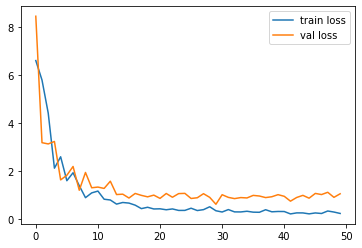

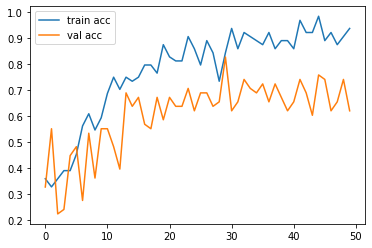

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [19]:
model=load_model('model_resnet50.h5')

In [33]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/pranavkalikate/Desktop/ALGO/Car_brand/Test/audi/27.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices


{'audi': 0, 'lamborghini': 1, 'mercedes': 2}

In [34]:
print('Car brand is : ', result)

Car brand is :  [[1.0053536e-10 8.9903996e-19 1.0000000e+00]]


In [35]:
test_image.shape

(1, 224, 224, 3)

In [36]:
a=np.argmax(model.predict(test_image),axis=1)

In [37]:
a

array([2])

In [ ]:
#Need to add more images in training set